In [2]:
import findspark
import pyspark


In [3]:
import os
os.getcwd()


'/home/jovyan'

In [4]:
from pyspark.sql import SparkSession
from pyspark import SparkContext

In [5]:
spark = SparkSession \
    .builder \
    .appName("Pysparkexample") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [1]:
import requests

my_path = '/data/vol/depart'
curl = requests.get('http://192.168.122.206:50070/webhdfs/v1/%s?op=LISTSTATUS&namenoderpcaddress=192.168.122.206:8020' % my_path)

In [2]:
'http://192.168.122.206:50070/webhdfs/v1/%s?op=LISTSTATUS&namenoderpcaddress=192.168.122.206:8020' % my_path

'http://192.168.122.206:50070/webhdfs/v1//data/vol/depart?op=LISTSTATUS&namenoderpcaddress=192.168.122.206:8020'

In [8]:
import os

file_paths = []
for file_status in curl.json()['FileStatuses']['FileStatus']:
    file_name = file_status['pathSuffix']
    # this is the file name in the queried directory
    if file_name.endswith('.csv'):
    # if statement is only required if the directory contains unwanted files (i.e. non-csvs).
        file_paths.append(os.path.join(my_path, file_name))
        # os.path.join asserts your result consists of absolute path

file_paths

['/data/vol/depart/2020-01-20_14-27-12.csv',
 '/data/vol/depart/2020-01-20_15-27-13.csv',
 '/data/vol/depart/2020-01-20_16-27-14.csv',
 '/data/vol/depart/2020-01-20_17-27-15.csv',
 '/data/vol/depart/2020-01-20_18-27-17.csv',
 '/data/vol/depart/2020-01-20_19-27-18.csv',
 '/data/vol/depart/2020-01-20_20-27-19.csv',
 '/data/vol/depart/2020-01-20_21-27-20.csv',
 '/data/vol/depart/2020-01-20_22-27-21.csv',
 '/data/vol/depart/2020-01-20_23-27-23.csv',
 '/data/vol/depart/2020-01-21_00-27-24.csv',
 '/data/vol/depart/2020-01-21_01-27-25.csv',
 '/data/vol/depart/2020-01-21_02-27-26.csv',
 '/data/vol/depart/2020-01-21_03-27-27.csv',
 '/data/vol/depart/2020-01-21_04-27-29.csv',
 '/data/vol/depart/2020-01-21_05-27-30.csv',
 '/data/vol/depart/2020-01-21_06-27-31.csv',
 '/data/vol/depart/2020-01-21_07-27-32.csv',
 '/data/vol/depart/2020-01-21_08-27-34.csv',
 '/data/vol/depart/2020-01-21_09-27-35.csv',
 '/data/vol/depart/2020-01-21_10-27-36.csv',
 '/data/vol/depart/2020-01-21_11-27-37.csv',
 '/data/vo

In [9]:
import requests

my_path = '/data/meteo'
curl = requests.get('http://192.168.122.206:50070/webhdfs/v1/%s?op=LISTSTATUS&namenoderpcaddress=192.168.122.206:8020' % my_path)

In [10]:
import os

meteo_paths = []
for file_status in curl.json()['FileStatuses']['FileStatus']:
    file_name = file_status['pathSuffix']
    # this is the file name in the queried directory
    if file_name.endswith('.csv'):
    # if statement is only required if the directory contains unwanted files (i.e. non-csvs).
        meteo_paths.append(os.path.join(my_path, file_name))
        # os.path.join asserts your result consists of absolute path

meteo_paths

['/data/meteo/2020-01-20_15-40-40.csv',
 '/data/meteo/2020-01-20_15-42-06.csv',
 '/data/meteo/2020-01-20_16-25-42.csv',
 '/data/meteo/2020-01-20_17-25-47.csv',
 '/data/meteo/2020-01-20_18-25-52.csv',
 '/data/meteo/2020-01-20_19-25-57.csv',
 '/data/meteo/2020-01-20_20-26-02.csv',
 '/data/meteo/2020-01-20_21-26-07.csv',
 '/data/meteo/2020-01-20_22-26-11.csv',
 '/data/meteo/2020-01-20_23-26-15.csv',
 '/data/meteo/2020-01-21_00-26-20.csv',
 '/data/meteo/2020-01-21_01-26-24.csv',
 '/data/meteo/2020-01-21_02-26-29.csv',
 '/data/meteo/2020-01-21_03-26-33.csv',
 '/data/meteo/2020-01-21_04-26-38.csv',
 '/data/meteo/2020-01-21_05-26-42.csv',
 '/data/meteo/2020-01-21_06-26-46.csv',
 '/data/meteo/2020-01-21_07-26-51.csv',
 '/data/meteo/2020-01-21_08-26-56.csv',
 '/data/meteo/2020-01-21_09-27-02.csv',
 '/data/meteo/2020-01-21_10-27-08.csv',
 '/data/meteo/2020-01-21_11-27-13.csv',
 '/data/meteo/2020-01-21_12-27-18.csv',
 '/data/meteo/2020-01-21_13-27-23.csv',
 '/data/meteo/2020-01-21_14-27-28.csv',


In [11]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.4.1 pyspark-shell'

In [12]:
sc = pyspark.SparkContext
path = os.path.join("http://192.168.122.206:50075/webhdfs/v1//data/vol/depart", "2020-01-20_14-27-12.csv?op=OPEN&namenoderpcaddress=192.168.122.206:8020")
path
#sc.addFile(path)


'http://192.168.122.206:50075/webhdfs/v1//data/vol/depart/2020-01-20_14-27-12.csv?op=OPEN&namenoderpcaddress=192.168.122.206:8020'

In [13]:
df_load = spark.read.csv('hdfs://192.168.122.206:8020/data/vol/depart/*.csv',header='true')

In [14]:
df_load.repartition(1) .write .mode ("overwrite").format("com.databricks.spark.csv").option("header", "true") .save("filename.csv")

In [16]:
df_load.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- aircraft_aircrafttype_iatacode: string (nullable = true)
 |-- aircraft_aircrafttype_icaocode: string (nullable = true)
 |-- aircraft_aircrafttype_modelname: string (nullable = true)
 |-- airlines_airline_iatacode: string (nullable = true)
 |-- airlines_airline_icaocode: string (nullable = true)
 |-- airlines_airline_name: string (nullable = true)
 |-- airlines_operator_iatacode: string (nullable = true)
 |-- airlines_operator_icaocode: string (nullable = true)
 |-- airlines_operator_name: string (nullable = true)
 |-- airportresources_boarding_departurelounge: string (nullable = true)
 |-- airportresources_boarding_gates: string (nullable = true)
 |-- airportresources_checkin_checkinarea: string (nullable = true)
 |-- airportresources_checkin_desks: string (nullable = true)
 |-- airportresources_terminal: string (nullable = true)
 |-- airports_destination_iatacode: string (nullable = true)
 |-- airports_destination_icaocode: string (nullable

In [17]:
df=df_load.orderBy('last_update_fme', ascending = False).dropDuplicates(['aircraft_aircrafttype_iatacode','timestamps_eobt','airports_next_name'])

In [18]:
df.count()

18290

In [19]:
df.count()

KeyboardInterrupt: 

In [ ]:
df_load.count()

In [6]:
df_load_meteo = spark.read.csv('hdfs://192.168.122.206:8020/data/meteo/*.csv')

In [ ]:
df_load_meteo.show(10000)

In [7]:
df_load_meteo=df_load_meteo.withColumnRenamed("_c0","index").withColumnRenamed("_c1","numero").withColumnRenamed("_c2","pression").withColumnRenamed("_c3","direction_de_vent").withColumnRenamed("_c4","vitesse_de_vent").withColumnRenamed("_c5","temperature").withColumnRenamed("_c6","humidité").withColumnRenamed("_c7","visibilité").withColumnRenamed("_c8","nebulosite").withColumnRenamed("_c9","hauteur_neige").withColumnRenamed("_c10","precipitations_1").withColumnRenamed("_c11","precipitations_3").withColumnRenamed("_c12","nom").withColumnRenamed("_c13","longitude").withColumnRenamed("_c14","latitude").withColumnRenamed("_c15","timestamp") 

In [8]:
df_load_meteo.printSchema()

root
 |-- index: string (nullable = true)
 |-- numero: string (nullable = true)
 |-- pression: string (nullable = true)
 |-- direction_de_vent: string (nullable = true)
 |-- vitesse_de_vent: string (nullable = true)
 |-- temperature: string (nullable = true)
 |-- humidité: string (nullable = true)
 |-- visibilité: string (nullable = true)
 |-- nebulosite: string (nullable = true)
 |-- hauteur_neige: string (nullable = true)
 |-- precipitations_1: string (nullable = true)
 |-- precipitations_3: string (nullable = true)
 |-- nom: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- timestamp: string (nullable = true)



In [ ]:
df_load_meteo=df_load_meteo.drop(df_load_meteo.index)

In [ ]:
from pyspark.sql.functions import from_unixtime,from_utc_timestamp
func =  lambda x:from_unixtime(x, format='yyyy-MM-dd HH:mm:ss')
df_load_meteo=df_load_meteo.withColumn('timestamp',func(df_load_meteo['timestamp']))

In [ ]:
df_load_meteo.filter(df_load_meteo.timestamp == '2020-01-20 14:38:29').show(10)

In [ ]:
df_load_meteo['timestamp'][0]

In [ ]:
df_load_meteo.select('nom').first()

In [ ]:
df_load_meteo=df_load_meteo.dropDuplicates(['nom','timestamp'])

In [ ]:
import pyspark.sql.functions as F
df_meteo=df_load_meteo.withColumn("timestamp_30_before", df_load_meteo.timestamp - F.expr('INTERVAL 30 MINUTES') )
df_meteo=df_meteo.withColumn("timestamp_30_after", df_load_meteo.timestamp + F.expr('INTERVAL 30 MINUTES') )

In [ ]:
df_Lyon_meteo=df_meteo.filter("nom = 'Arrondissement de Lyon'")

In [ ]:
joined_df = df.join(df_Lyon_meteo, [df.timestamps_eobt < df_Lyon_meteo.timestamp_30_after,df_Lyon_meteo.timestamp_30_before < df.timestamps_eobt], how='inner')

In [ ]:
joined_df=joined_df.dropDuplicates(['aircraft_aircrafttype_iatacode','timestamps_eobt','airports_next_name'])

In [ ]:
joined_df=joined_df.orderBy('timestamps_eobt').select(['aircraft_aircrafttype_icaocode','flightnumbers_icaoflightnumber', 'airportresources_terminal','airports_destination_name','airlines_operator_icaocode','airlines_airline_icaocode','countrytype_code','timestamps_sobt','timestamps_eobt','pression', 'direction_de_vent',
       'vitesse_de_vent', 'temperature', 'humidité', 'visibilité',
       'nebulosite', 'hauteur_neige', 'precipitations_1', 'latitude', 'longitude'])

In [ ]:
def change(row):
    row['day']=row['timestamps_sobt'].day
    row['month']=row["timestamps_sobt"].month
    row['year']=row["timestamps_sobt"].year
    row['hour']=row["timestamps_sobt"].hour
    row['minute']=row["timestamps_sobt"].minute
    if((row['timestamps_eobt']-row['timestamps_sobt']).seconds/60 > 0):
        row['delay']=int((row['timestamps_eobt']-row['timestamps_sobt']).seconds/60)
    else :
        row['delay']=0
    if(int(row['delay'])<=15):
        row['delayLabel']='[0-15]'
    elif(15<int(row['delay'])<=30) :
        row['delayLabel']='[15-30]'
    elif(30<int(row['delay'])<=45) :
        row['delayLabel']='[30-45]'
    elif(45<int(row['delay'])<=60) :
        row['delayLabel']='[45-60]'
    elif(60<int(row['delay'])<=75) :
        row['delayLabel']='[60-75]'
    elif(75<int(row['delay'])<=90) :
        row['delayLabel']='[75-90]'
    elif(105<int(row['delay'])<=120) :
        row['delayLabel']='[105-120]'
    elif(120<int(row['delay'])<=135) :
        row['delayLabel']='[120-135]'
    elif(90<int(row['delay'])<=105) :
        row['delayLabel']='[90-105]'
    elif(150<int(row['delay'])<=165) :
        row['delayLabel']='[150-165]'
    elif(165<int(row['delay'])<=180) :
        row['delayLabel']='[165-180]'
    elif(180<int(row['delay'])<=195) :
        row['delayLabel']='[180-195]'
    elif(210<int(row['delay'])<=225) :
        row['delayLabel']='[210-225]'
    elif(225<int(row['delay'])<=240) :
        row['delayLabel']='[225-240]'
    elif(240<int(row['delay'])<=255) :
        row['delayLabel']='[240-255]'
    elif(255<int(row['delay'])<=270) :
        row['delayLabel']='[255-270]'
    elif(270<int(row['delay'])<=285) :
        row['delayLabel']='[270-285]'
    elif(285<int(row['delay'])<=300) :
        row['delayLabel']='[285-300]'
    elif(195<int(row['delay'])<=210) :
        row['delayLabel']='[195-210]'
    else :
        row['delayLabel']='more then 4 hours'
    
    return row
            

In [ ]:
pdf=joined_df.select('aircraft_aircrafttype_icaocode','flightnumbers_icaoflightnumber','airports_destination_name','airlines_operator_icaocode','airlines_airline_icaocode','timestamps_sobt','timestamps_eobt','pression', 'direction_de_vent',
       'vitesse_de_vent', 'temperature', 'humidité', 'visibilité',
       'nebulosite', 'hauteur_neige', 'precipitations_1', 'latitude', 'longitude').toPandas()

In [ ]:
from datetime import datetime
pdf['timestamps_eobt'] = pdf['timestamps_eobt'].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S"))
pdf['timestamps_sobt'] =pdf['timestamps_sobt'].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S"))
pdf=pdf.apply(lambda x:change(x),axis=1)

In [ ]:
traindf=pdf

In [ ]:
set(traindf['delayLabel'])

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch


fig_dim=(14,18)
f,ax=plt.subplots(figsize=fig_dim)
quality=traindf['delayLabel'].unique()
size=traindf['delayLabel'].value_counts()
plt.pie(size,labels=quality,autopct="%1.0f%%")
plt.show() 

In [26]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
traindf[['aircraft_aircrafttype_icaocode','flightnumbers_icaoflightnumber','airports_destination_name','airlines_operator_icaocode','airlines_airline_icaocode']]=traindf[['aircraft_aircrafttype_icaocode','flightnumbers_icaoflightnumber','airports_destination_name','airlines_operator_icaocode','airlines_airline_icaocode']].apply(LabelEncoder().fit_transform)
                         

In [27]:
traindf.dtypes

aircraft_aircrafttype_icaocode             int64
flightnumbers_icaoflightnumber             int64
airports_destination_name                  int64
airlines_operator_icaocode                 int64
airlines_airline_icaocode                  int64
timestamps_sobt                   datetime64[ns]
timestamps_eobt                   datetime64[ns]
pression                                  object
direction_de_vent                         object
vitesse_de_vent                           object
temperature                               object
humidité                                  object
visibilité                                object
nebulosite                                object
hauteur_neige                             object
precipitations_1                          object
latitude                                  object
longitude                                 object
day                                        int64
month                                      int64
year                

In [ ]:
traindf=traindf.astype({'pression': 'float64'})
traindf=traindf.astype({'direction_de_vent': 'float64'})
traindf=traindf.astype({'vitesse_de_vent': 'float64'})

traindf=traindf.astype({'temperature': 'float64'})
traindf=traindf.astype({'humidité': 'float64'})
traindf=traindf.astype({'visibilité': 'float64'})
traindf=traindf.astype({'hauteur_neige': 'float64'})
traindf=traindf.astype({'latitude': 'float64'})
traindf=traindf.astype({'longitude': 'float64'})
traindf=traindf.astype({'nebulosite': 'float64'})

traindf=traindf.drop(['timestamps_sobt','precipitations_1'], axis=1)

In [ ]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(traindf.drop('retard', axis=1), traindf['retard'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['avec retard', 'sans retard']
students = [len(oversampled_train[oversampled_train["retard"]==1]),len(oversampled_train[oversampled_train["retard"]!=1])]
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(traindf.drop("delayLabel", axis=1), traindf["delayLabel"], test_size=0.3, random_state=42)

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
model = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(loss='l2', penalty='l1', dual=False))),
  ('classification', RandomForestClassifier())
])

In [196]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [2]:
import pymc3 as pm
import theano.tensor as T

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [3]:
def construct_nn(ann_input, ann_output):
    n_hidden = 5

    # Initialize random weights between each layer
    init_1 = np.random.randn(X.shape[1], n_hidden).astype(floatX)
    init_2 = np.random.randn(n_hidden, n_hidden).astype(floatX)
    init_out = np.random.randn(n_hidden).astype(floatX)

    with pm.Model() as neural_network:
        # Trick: Turn inputs and outputs into shared variables using the data container pm.Data
        # It's still the same thing, but we can later change the values of the shared variable
        # (to switch in the test-data later) and pymc3 will just use the new data.
        # Kind-of like a pointer we can redirect.
        # For more info, see: http://deeplearning.net/software/theano/library/compile/shared.html
        ann_input = pm.Data('ann_input', X_train)
        ann_output = pm.Data('ann_output', Y_train)

        # Weights from input to hidden layer
        weights_in_1 = pm.Normal('w_in_1', 0, sigma=1,
                                 shape=(X.shape[1], n_hidden),
                                 testval=init_1)

        # Weights from 1st to 2nd layer
        weights_1_2 = pm.Normal('w_1_2', 0, sigma=1,
                                shape=(n_hidden, n_hidden),
                                testval=init_2)

        # Weights from hidden layer to output
        weights_2_out = pm.Normal('w_2_out', 0, sigma=1,
                                  shape=(n_hidden,),
                                  testval=init_out)

        # Build neural-network using tanh activation function
        act_1 = pm.math.tanh(pm.math.dot(ann_input,
                                         weights_in_1))
        act_2 = pm.math.tanh(pm.math.dot(act_1,
                                         weights_1_2))
        act_out = pm.math.sigmoid(pm.math.dot(act_2,
                                              weights_2_out))

        # Binary classification -> Bernoulli likelihood
        out = pm.Bernoulli('out',
                           act_out,
                           observed=ann_output,
                           total_size=Y_train.shape[0] # IMPORTANT for minibatches
                          )
    return neural_network

neural_network = construct_nn(train_x, train_y)

NameError: name 'train_x' is not defined

In [ ]:
from sklearn.feature_selection import f_regression

In [ ]:
f_regression(traindf.drop('retard', axis=1), traindf['retard'], center=True)

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, )
lr = LinearRegression(normalize=True)
regr = RandomForestRegressor(max_depth=2, random_state=0)
selector = RFECV(estimator=lr, cv=10,scoring='neg_mean_squared_error')
selector.fit(traindf.drop('retard_depart', axis=1), traindf['retard_depart'])
print("Optimal number of features: %d"
 %selector.n_features_)

In [ ]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
Selector_f = SelectPercentile(f_regression, percentile=25)
Selector_f.fit(traindf.drop('retard_depart', axis=1), traindf['retard_depart'])
for n,s in zip(traindf.columns,Selector_f.scores_):
     print("F-score: %3.2ft for feature %s" %(s,n)) 

In [ ]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(traindf.drop('retard', axis=1), traindf['retard'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)


In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(pdf[['retard_depart', 'direction_de_vent', 'vitesse_de_vent',
       'humidité', 'visibilité']])

In [ ]:
pdf

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(traindf.drop('delayLabel', axis=1).values, traindf['delayLabel'], test_size=0.3, random_state=42)

In [43]:
traindf=traindf[['aircraft_aircrafttype_icaocode', 'flightnumbers_icaoflightnumber', 'airports_destination_name','airlines_operator_icaocode','airlines_airline_icaocode', 'pression',
       'direction_de_vent', 'vitesse_de_vent', 'temperature', 'humidité',
       'visibilité', 'hauteur_neige','nebulosite',
       'latitude', 'longitude', 'day', 'month', 'year','hour','minute', 'delayLabel']]

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()# Fit on training set only.
scaler.fit(X_train)# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [631]:
from sklearn.decomposition import PCA# Make an instance of the Model
pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_train = pd.DataFrame(data = X_train)
X_test = pca.fit_transform(X_test)
X_test = pd.DataFrame(data = X_test)

In [46]:
import numpy as np
threshold = 10 # Anything that occurs less than this will be removed.
value_counts = traindf['delayLabel'].value_counts() # Specific column 
to_remove = value_counts[value_counts <= threshold].index
traindf['delayLabel'].replace(to_remove, np.nan, inplace=True)
traindf=traindf.dropna()

In [47]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority')

# Fit the y_train to generate the data.
X_train, y_train = sm.fit_sample(traindf.drop('delayLabel', axis=1), traindf['delayLabel'])


In [51]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
import numpy as np
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,14)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

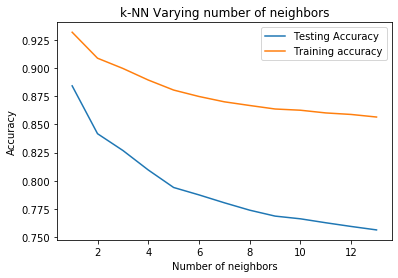

In [52]:


#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()



In [750]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import (PrincipalComponentsAnalysis,KNeighborsClassifier)
nca = NeighborhoodComponentsAnalysis(random_state=5)
knn = KNeighborsClassifier(n_neighbors=12)


In [40]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=3, random_state=0))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=5))
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=0))
knn = KNeighborsClassifier(n_neighbors=14)
lda.fit(X_train, y_train)
knn.fit(lda.transform(X_train), y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [778]:
nca.fit(X_train, y_train)

KeyboardInterrupt: 

In [765]:
knn.score(lda.transform(X_test),y_test)

0.7442550037064493

In [766]:
y_pred = knn.predict(lda.transform(X_test))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                   precision    recall  f1-score   support

           [0-15]       0.75      1.00      0.85      3015
        [105-120]       0.00      0.00      0.00        31
        [120-135]       0.00      0.00      0.00        20
          [15-30]       0.00      0.00      0.00       372
        [150-165]       0.00      0.00      0.00         9
        [165-180]       0.00      0.00      0.00         8
        [180-195]       0.00      0.00      0.00         8
        [195-210]       0.00      0.00      0.00         4
        [210-225]       0.00      0.00      0.00         2
        [225-240]       0.00      0.00      0.00         1
        [240-255]       0.00      0.00      0.00         3
        [255-270]       0.00      0.00      0.00         1
        [270-285]       0.00      0.00      0.00         2
        [285-300]       0.00      0.00      0.00         2
          [30-45]       0.33      0.02      0.03       195
          [45-60]       0.40      0.01      0.03       

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [759]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,average='micro')

0.7407956510995799

In [120]:
X_train[1]

array([5.0000e+00, 1.5100e+02, 1.0000e+00, 8.0000e+01, 2.0000e+00,
       1.0130e+05, 1.9000e+02, 4.6000e+00, 2.8167e+02, 5.3000e+01,
       1.0000e+04, 9.0000e+01, 0.0000e+00, 4.5800e+00, 4.5750e+01,
       4.0000e+00, 3.0000e+00, 2.0200e+03, 0.0000e+00])

In [123]:
knn.predict([X_train[1]])

array(['[0-15]'], dtype=object)

In [33]:
traindf

,aircraft_aircrafttype_icaocode,flightnumbers_icaoflightnumber,airports_destination_name,airlines_operator_icaocode,airlines_airline_icaocode,pression,direction_de_vent,vitesse_de_vent,temperature,humidité,...,hauteur_neige,nebulosite,latitude,longitude,day,month,year,hour,minute,delayLabel
0,5,260,27,40,39,103700.0,350.0,2.1,278.67,48.0,...,0.0,1.0,4.58,45.75,20,1,2020,14,10,[0-15]
1,4,173,115,20,19,103700.0,350.0,2.1,278.67,48.0,...,0.0,1.0,4.58,45.75,20,1,2020,14,20,[0-15]
2,33,247,5,36,35,103700.0,350.0,2.1,278.67,48.0,...,0.0,1.0,4.58,45.75,20,1,2020,14,10,[0-15]
3,33,249,68,36,35,103700.0,350.0,2.1,278.67,48.0,...,0.0,1.0,4.58,45.75,20,1,2020,14,26,[0-15]
4,4,153,83,20,19,103700.0,350.0,2.1,278.67,48.0,...,0.0,1.0,4.58,45.75,20,1,2020,14,30,[0-15]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15245,5,243,69,34,33,102000.0,180.0,4.1,285.87,41.0,...,0.0,25.0,4.58,45.75,16,3,2020,11,10,[0-15]
15246,28,70,92,2,2,102000.0,180.0,4.1,285.87,41.0,...,0.0,25.0,4.58,45.75,16,3,2020,11,10,[0-15]
15247,5,171,116,20,19,102000.0,180.0,4.1,285.87,41.0,...,0.0,25.0,4.58,45.75,16,3,2020,10,40,[30-45]
15248,4,155,83,20,19,102000.0,180.0,4.1,285.87,41.0,...,0.0,25.0,4.58,45.75,16,3,2020,11,0,[0-15]


In [110]:
import json
import requests
import time
import pandas as pd
import csv
from datetime import datetime
import datetime as dt
import pandas as pd
from datetime import timezone
date=datetime.now()
timestap1=date.replace(tzinfo=timezone.utc).timestamp()
timestamp2=(date+ dt.timedelta(15)).replace(tzinfo=timezone.utc).timestamp()
print((date+ dt.timedelta(15)).replace(tzinfo=timezone.utc))
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'} 
url="https://www.radarbox24.com/search/flights?destination=LFLL&minarrs="+str(timestap1)+"&maxarrs="+str(timestamp2)+"&first=20000&reverse=0"
response = requests.get(url, headers=headers)
data_arrive=response.json()
df_arrive = pd.DataFrame(data_arrive) 
variabletodrop=['replay','isFuture', 'departureRelative','statusLabel','arrivalRelative']
df_arrive=df_arrive.drop(variabletodrop,axis=1)
#ecrire dans un fichier CSV mon dataframe



2020-08-03 10:41:06.366824+00:00


In [81]:
df_arrive.iloc[1].values.tolist()

[1436387101,
 None,
 'TC-LSA',
 'A21N',
 'THY',
 'Turkish Airlines',
 1150.0,
 'Lyon',
 'France',
 'LYS',
 'LFLL',
 45.7264,
 5.09083,
 'Rhône Alpes',
 2,
 'Central European Summer Time',
 'CEST',
 'Istanbul',
 'Turkey',
 'IST',
 'LTFM',
 41.2753,
 28.7519,
 'Istanbul',
 3,
 'Eastern European Time',
 'EET',
 'LTFM',
 1595144400.0,
 '10:09',
 1595146178.0,
 '09:50',
 1595145000.0,
 None,
 'THY54KB',
 'THY',
 'Turkish Airlines',
 nan,
 '07:25',
 1595132700.0,
 '07:25',
 1595132700.0,
 41.3121317200741,
 'Istanbul',
 'Turkey',
 nan,
 1595133912149.0,
 28.7038421630859,
 'TK1807',
 'THY1807',
 45.6906280517578,
 'Lyon',
 'France',
 nan,
 1595144060195,
 5.0972543111662,
 'detected',
 1595144081.0,
 1595145000,
 1595132700,
 '4BB261',
 None,
 None,
 None,
 None,
 'ADSB',
 1595145003129,
 None,
 None,
 'guessed',
 1595133878.0,
 296.0,
 '07:44',
 'tkotc',
 '09:40',
 'arra',
 '6m',
 'landed',
 100,
 '02h55m',
 'actual',
 1964122,
 1595132700,
 1595143500,
 1595145000,
 1595152200,
 '19 Jul',


In [57]:
set(df_arrive[ 'aporgci'].values.tolist())

{'Agadir',
 'Ajaccio/Napoléon Bonaparte',
 'Algiers',
 'Amsterdam',
 'Antalya',
 'Athens',
 'Barcelona',
 'Bastia/Poretta',
 'Beirut',
 'Biarritz/Anglet/Bayonne',
 'Bordeaux/Mérignac',
 'Brest/Guipavas',
 'Brussels',
 'Bucharest',
 'Caen/Carpiquet',
 'Calvi/Sainte-Catherine',
 'Casablanca',
 'Cluj-Napoca',
 'Djerba',
 'Dublin',
 'Edinburgh',
 'Faro',
 'Fes',
 'Figari Sud-Corse',
 'Frankfurt',
 'Heraklion',
 'Istanbul',
 'Izmir',
 'Lille/Lesquin',
 'Limoges/Bellegarde',
 'Lisbon',
 'Luqa',
 'Madrid',
 'Marseille',
 'Monastir',
 'Munich',
 'Málaga',
 'Nantes',
 'Nice',
 'Palermo',
 'Paris',
 'Pau/Pyrénées (Uzein)',
 'Poitiers/Biard',
 'Porto',
 'Rennes/Saint-Jacques',
 'Rodes Island',
 'Souda',
 'Split',
 'Strasbourg',
 'Toulouse',
 'Tunis',
 'Yerevan'}

In [ ]:
import ipywidgets as widgets

In [519]:
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.insert(0, ALL)
    return unique

In [520]:
dictDate={}
def unique_sorted_values_date(array):
    
    unique = array.unique().tolist()
    for i in range(0,len(unique)):
        timestimp=unique[i]
        unique[i]=datetime.fromtimestamp(unique[i]).strftime('%Y-%m-%d %H:%M:%S')
        dictDate[datetime.fromtimestamp(timestimp).strftime('%Y-%m-%d %H:%M:%S')]=timestimp
    
    return unique

In [521]:
dropdown_year = widgets.Dropdown(options =    unique_sorted_values_plus_ALL(df_arrive.apdstst))

In [522]:
dropdown_date = widgets.Dropdown()
cit=""
def dropdown_year_eventhandl(change):
    global cit
    if (change.new != ALL):
        cit=change.new
        options=unique_sorted_values_date(df_arrive[df_arrive.apdstst==change.new].depsts)
        dropdown_date.options=options


In [523]:
def dropdown_date_eventhandl(change):
    df_merge=df_arrive.loc[((df_arrive.depsts==dictDate[change.new])&( df_arrive.apdstst==cit))]
    df_merge=df_merge[['alic','fnic','apdstci']]
    df_meteo=df_Meteo[['pres','wind_dir','wind_spd','temp','rh','vis','snow_depth','datetime']][df_Meteo.datetime==change.new.split(" ")[0]]
    df_meteo=df_meteo.apply(change1,axis=1)
    df_merge=df_merge.apply(lb_make.fit_transform)
    df_meteo=df_meteo.drop('datetime',axis=1)
    #df_merge=pd.concat([df_merge, df_meteo], axis=1, join='outer', ignore_index=False, keys=None,levels=None, names=None, verify_integrity=False, copy=True)
    df_merge=df_merge.join(df_meteo)
    display(df_merge[0])
    display(df_meteo)

In [524]:
dropdown_year.observe(dropdown_year_eventhandl, names='value')

In [525]:
dropdown_date.observe(dropdown_date_eventhandl, names='value')

In [526]:
def change1(row):
    row['day']=row['datetime'].split("-")[2]
    row['month']=row["datetime"].split("-")[1]
    row['year']=row["datetime"].split("-")[0]
    return row

In [26]:
url="https://api.weatherbit.io/v2.0/forecast/daily?city=munich,DE&key=117ca9474faf487d89ecfa2cc2af118d"
response = requests.get(url, headers=headers)
data_arrive=response.json()
df_Meteo = pd.DataFrame(data_arrive["data"]) 

In [22]:
df_Meteo=df_Meteo[['pres','wind_dir','wind_spd','temp','rh','vis','snow_depth','precip','datetime']]

In [23]:
df_Meteo

,pres,wind_dir,wind_spd,temp,rh,vis,snow_depth,precip,datetime
0,1018.590,282,2.481220,21.2,65,0.0000,0,0.007812,2020-07-18
1,1017.890,280,2.415060,20.0,70,0.0000,0,0.000000,2020-07-19
2,1012.860,278,1.566990,21.0,64,0.0000,0,0.015625,2020-07-20
3,1004.110,140,2.257620,20.0,65,22.5020,0,1.875000,2020-07-21
4,997.732,262,3.846770,16.5,73,18.9410,0,10.250000,2020-07-22
5,994.920,201,4.164030,14.5,78,21.2885,0,6.625000,2020-07-23
6,996.001,110,3.017370,14.1,76,24.1350,0,0.250000,2020-07-24
7,1001.170,245,1.708380,16.1,73,24.1350,0,0.250000,2020-07-25
8,1005.420,234,1.673190,17.6,72,23.3328,0,2.437500,2020-07-26
9,1007.660,298,2.209970,17.7,68,24.1351,0,0.000000,2020-07-27


In [530]:
from IPython.display import display
display(dropdown_year)
display(dropdown_date)

Dropdown(options=('ALL', 'Yerevan (capital district)', 'Moscow Oblast', 'Istanbul', 'Agadir', 'Amman', 'Casabl…

Dropdown(options=(), value=None)

KeyError: 0

In [538]:
lb_make.


AttributeError: 'LabelEncoder' object has no attribute 'classe'

In [613]:
X_test

array([[-1.37740437, -0.74433702, -1.33622525, ..., -0.34953815,
         0.94233772, -0.04064622],
       [ 3.31686583,  0.26238273,  1.61509699, ..., -0.12275447,
         1.16044698, -0.03542498],
       [ 1.45947122,  2.08295511,  2.25244729, ..., -0.81392396,
         1.51952072, -0.5813347 ],
       ...,
       [-0.29505647, -0.00910977,  0.51386569, ..., -1.04872375,
         0.03379059, -1.11279816],
       [ 2.95786614,  0.53206407,  0.6325697 , ..., -0.60906473,
         0.58107436,  0.3253388 ],
       [-1.45664853, -0.71822923, -0.5710778 , ..., -0.42927734,
         0.63804203, -1.43530657]])

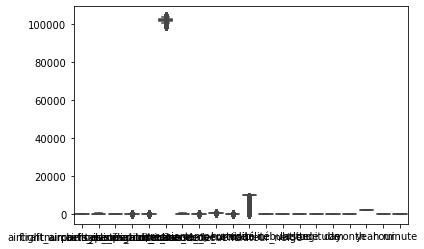

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=traindf.drop('delayLabel',axis=1))

In [36]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(min_samples = 6, eps = 3)
clusters = outlier_detection.fit_predict(traindf.drop('delayLabel',axis=1))
list(clusters).count(-1)

13852

In [77]:
for i in set(traindf['delayLabel']):
    print(i,traindf[traindf['delayLabel']==i]['delayLabel'].count())

[120-135] 60
[165-180] 25
[105-120] 114
[150-165] 30
[60-75] 325
[45-60] 500
[75-90] 208
[240-255] 10
[0-15] 10372
[15-30] 1273
[90-105] 155
[195-210] 26
[180-195] 24
[30-45] 693
more then 4 hours 91


In [30]:
traindf.count()[0]

13931

In [53]:
pdf

,aircraft_aircrafttype_icaocode,flightnumbers_icaoflightnumber,airports_destination_name,airlines_operator_icaocode,airlines_airline_icaocode,timestamps_sobt,timestamps_eobt,pression,direction_de_vent,vitesse_de_vent,...,precipitations_1,latitude,longitude,day,month,year,hour,minute,delay,delayLabel
0,5,260,27,40,39,2020-01-20 14:10:00,2020-01-20 14:10:00,103700,350,2.1,...,0.0.1,4.58,45.75,20,1,2020,14,10,0,[0-15]
1,4,173,115,20,19,2020-01-20 14:20:00,2020-01-20 14:20:00,103700,350,2.1,...,0.0.1,4.58,45.75,20,1,2020,14,20,0,[0-15]
2,33,247,5,36,35,2020-01-20 14:10:00,2020-01-20 14:25:00,103700,350,2.1,...,0.0.1,4.58,45.75,20,1,2020,14,10,15,[0-15]
3,33,249,68,36,35,2020-01-20 14:26:00,2020-01-20 14:26:00,103700,350,2.1,...,0.0.1,4.58,45.75,20,1,2020,14,26,0,[0-15]
4,4,153,83,20,19,2020-01-20 14:30:00,2020-01-20 14:30:00,103700,350,2.1,...,0.0.1,4.58,45.75,20,1,2020,14,30,0,[0-15]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15245,5,243,69,34,33,2020-03-16 11:10:00,2020-03-16 11:10:00,102000,180,4.1,...,0.0.1,4.58,45.75,16,3,2020,11,10,0,[0-15]
15246,28,70,92,2,2,2020-03-16 11:10:00,2020-03-16 11:11:00,102000,180,4.1,...,0.0.1,4.58,45.75,16,3,2020,11,10,1,[0-15]
15247,5,171,116,20,19,2020-03-16 10:40:00,2020-03-16 11:11:00,102000,180,4.1,...,0.0.1,4.58,45.75,16,3,2020,10,40,31,[30-45]
15248,4,155,83,20,19,2020-03-16 11:00:00,2020-03-16 11:14:00,102000,180,4.1,...,0.0.1,4.58,45.75,16,3,2020,11,0,14,[0-15]


In [70]:
aeroports_ic={'Munich': 'DE',
 'Geneva': 'CH',
 'Oslo': 'NO',
 'Moscow': 'RU',
 'Amman': 'JO',
 'Antalya': 'TR',
 'Istanbul': 'TR',
 'Paris': 'FR',
 'Saint-Petersburg': 'RU',
 'Agadir': 'MA',
 'Copenhagen': 'DK',
 'Dublin': 'IE',
 'Madrid': 'ES',
 'Annabah': 'DZ',
 'Milan': 'IT',
 'Frankfurt': 'DE',
 'Constantine': 'DZ',
 'Berlin': 'DE',
 'Essaouira': 'MA',
 'Napoli': 'IT',
 'Manchester': 'UK',
 'Marrakech': 'MA',
 'London': 'UK',
 'Rome': 'IT',
 'Fes': 'MA',
 'Strasbourg': 'FR',
 'Nantes': 'FR',
 'Montreal': 'CA',
 'Marseille': 'FR',
 'Agadir':"MA",
 'Algiers':'DZ',
 'Amsterdam':'NL',
 'Athens':"GR",
 'Barcelona':'ES',
 'Beirut':'LB',
 'Brussels':'BE',
 'Bucharest':'RO',
 'Casablanca':'MA',
 'Djerba':'TN',
 'Edinburgh':"UK",
 'Faro':"PT",
 'Frankfurt':'DE',
 'Heraklion':"GR",
 'Izmir':'TR',
 'Lisbon':"PT",
 'Luqa':"MT",
 'Marseille':'FR',
 'Munich':'DE',
 'Málaga':'ES',
 'Nantes':'FR',
 'Nice':'FR',
 'Palermo':'IT',
 'Paris':'FR',
 'Porto':"PT",
 'Souda':'GR',
 'Strasbourg':'FR',
 'Toulouse':'FR',
 'Tunis':'TN',
 'Erevan':'AM',
  'Lyon':'FR'}

In [71]:
aeroports_ic.keys()

dict_keys(['Munich', 'Geneva', 'Oslo', 'Moscow', 'Amman', 'Antalya', 'Istanbul', 'Paris', 'Saint-Petersburg', 'Agadir', 'Copenhagen', 'Dublin', 'Madrid', 'Annabah', 'Milan', 'Frankfurt', 'Constantine', 'Berlin', 'Essaouira', 'Napoli', 'Manchester', 'Marrakech', 'London', 'Rome', 'Fes', 'Strasbourg', 'Nantes', 'Montreal', 'Marseille', 'Algiers', 'Amsterdam', 'Athens', 'Barcelona', 'Beirut', 'Brussels', 'Bucharest', 'Casablanca', 'Djerba', 'Edinburgh', 'Faro', 'Heraklion', 'Izmir', 'Lisbon', 'Luqa', 'Málaga', 'Nice', 'Palermo', 'Porto', 'Souda', 'Toulouse', 'Tunis', 'Erevan', 'Lyon'])

In [72]:
for key in aeroports_ic:
    print(key.lower()+","+aeroports_ic[key])
    url="https://api.weatherbit.io/v2.0/forecast/daily?city="+key.lower()+","+aeroports_ic[key]+"&key=117ca9474faf487d89ecfa2cc2af118d"
    response = requests.get(url, headers=headers)
    data_arrive=response.json()
    df_Meteo = pd.DataFrame(data_arrive["data"])
    print(df_Meteo)

munich,DE
    moonrise_ts wind_cdir  rh     pres  high_temp   sunset_ts    ozone  \
0    1595123556         S  69  956.204       23.2  1595185179  319.261   
1    1595213422        SW  65  956.093       26.4  1595271519  317.285   
2    1595303882         W  64  957.727       24.4  1595357856  307.965   
3    1595394757         E  63  962.236       23.1  1595444192  311.061   
4    1595485832       NNE  61  957.947       23.7  1595530525  311.411   
5    1595576949         W  68  954.640       21.4  1595616856  323.232   
6    1595668040       ESE  67  956.987       23.0  1595703185  320.005   
7    1595759100       SSE  62  957.024       17.2  1595789513  323.958   
8    1595850152       WSW  80  956.714       16.7  1595875838  334.136   
9    1595941202       WSW  82  957.513       22.6  1595962161  328.116   
10   1596032203         W  77  958.096       24.7  1596048483  333.275   
11   1596123025         W  81  960.040       23.1  1596134803  305.969   
12   1596209425         E  7

    moonrise_ts wind_cdir  rh     pres  high_temp   sunset_ts    ozone  \
0    1595114783       ESE  66  999.035       23.2  1595181273  332.759   
1    1595204587         W  83  995.786       21.2  1595267585  327.162   
2    1595295259       WNW  79  990.092       22.9  1595353895  324.001   
3    1595386550         W  63  985.315       22.3  1595440203  324.932   
4    1595478141         W  62  987.385       21.1  1595526508  343.502   
5    1595569798       WSW  58  990.912       20.9  1595612810  346.122   
6    1595661425       SSW  69  989.622       18.5  1595699110  336.549   
7    1595753014       WSW  72  988.067       21.6  1595785408  353.183   
8    1595844595         W  63  990.228       24.1  1595871704  341.976   
9    1595936181        SW  56  991.783       20.5  1595957997  323.580   
10   1596027713       SSW  77  983.816       19.4  1596044289  330.075   
11   1596119011        SW  65  981.048       20.3  1596130578  335.169   
12   1596209783         W  71  982.152

    moonrise_ts wind_cdir  rh     pres  high_temp   sunset_ts    ozone  \
0    1595120966        NE  65  1008.08       28.4  1595179521  295.404   
1    1595210801         S  74  1010.57       27.8  1595265877  296.208   
2    1595301082       ENE  71  1013.46       28.1  1595352232  295.193   
3    1595391664        NE  65  1008.35       28.2  1595438585  291.757   
4    1595482382        NE  64  1005.57       28.8  1595524936  294.130   
5    1595573118        NE  63  1003.30       28.5  1595611286  301.497   
6    1595663819        NE  67  1003.19       29.3  1595697634  298.761   
7    1595754490        NE  64  1005.59       29.1  1595783980  290.133   
8    1595845155        NE  68  1004.65       29.4  1595870324  288.101   
9    1595935827         E  71  1003.99       27.6  1595956667  293.868   
10   1596026480       ENE  62  1004.42       24.1  1596043008  291.875   
11   1596117028        NE  71  1004.50       24.1  1596129348  290.019   
12   1596207327        NE  63  1009.86

    moonrise_ts wind_cdir  rh      pres  high_temp   sunset_ts    ozone  \
0    1595129579        SW  94  1009.530       22.9  1595187665  289.013   
1    1595219072       SSW  91  1010.900       22.4  1595274037  291.420   
2    1595308943       SSW  88  1013.620       22.0  1595360407  288.819   
3    1595399107       SSW  55   967.050       35.9  1595446776  279.103   
4    1595489440       SSW  42   966.121       38.1  1595533144  272.071   
5    1595579817       SSW  44   963.914       35.5  1595619510  270.207   
6    1595670166       SSW  45   963.193       34.2  1595705875  274.730   
7    1595760464        SW  52   964.650       37.9  1595792239  275.120   
8    1595850732       SSW  45   965.138       43.5  1595878601  274.161   
9    1595941002       WSW  29   964.510       42.0  1595964962  272.316   
10   1596031297         S  25   963.760       38.7  1596051322  273.775   
11   1596121609         S  15   963.552       34.3  1596137680  277.519   
12   1596211875         S

    moonrise_ts wind_cdir  rh     pres  high_temp   sunset_ts    ozone  \
0    1595126084       SSE  27  945.704       36.7  1595187317  292.682   
1    1595215455       SSW  22  945.967       36.9  1595273673  293.264   
2    1595305335       ESE  35  947.381       35.2  1595360028  292.973   
3    1595395650       SSE  27  937.637       33.6  1595446381  300.653   
4    1595486251       SSW  27  936.035       35.3  1595532732  292.434   
5    1595576974       ESE  31  931.352       30.1  1595619081  297.819   
6    1595667708        NE  42  934.067       32.8  1595705429  323.305   
7    1595758406       ESE  31  938.346       34.5  1595791775  314.895   
8    1595849075       ENE  26  939.194       35.1  1595878119  295.836   
9    1595939740       ENE  31  940.798       37.1  1595964462  295.645   
10   1596030412         E  26  939.712       34.8  1596050803  297.025   
11   1596121061        SE  25  936.448       33.0  1596137142  293.369   
12   1596211592        NE  36  934.296

    moonrise_ts wind_cdir  rh      pres  high_temp   sunset_ts    ozone  \
0    1595124065         S  50  1002.340       27.9  1595186981  319.682   
1    1595210465        SE  57  1002.910       26.7  1595273314  322.981   
2    1595300342        SE  49  1006.930       24.4  1595359643  315.294   
3    1595390881       NNE  49  1005.950       24.2  1595445971  316.299   
4    1595481884        SE  46  1000.420       26.0  1595532297  314.789   
5    1595573110       WSW  52   996.056       25.3  1595618620  316.307   
6    1595664384       ENE  47   999.789       25.2  1595704941  323.555   
7    1595755631         S  45   998.230       23.0  1595791260  327.395   
8    1595846848         W  58   996.526       18.9  1595877577  340.911   
9    1595938056        SW  68   996.519       27.3  1595963892  337.759   
10   1596029262         W  65   998.744       25.5  1596050205  337.975   
11   1596120409       WSW  63  1000.700       26.9  1596136516  303.269   
12   1596211350       SSW

    moonrise_ts wind_cdir  rh     pres  high_temp   sunset_ts    ozone  \
0    1595132279       NNE  87  1011.37       23.6  1595187991  289.584   
1    1595222154         N  92  1011.93       22.3  1595274360  292.686   
2    1595312354         E  88  1014.32       22.4  1595360727  293.194   
3    1595402746       NNE  75  1007.55       26.4  1595447092  283.182   
4    1595493202       NNE  76  1006.75       26.1  1595533456  274.395   
5    1595583637       NNE  77  1005.23       26.4  1595619819  273.257   
6    1595674026       NNE  70  1005.36       25.2  1595706180  276.680   
7    1595764384       NNE  76  1005.85       28.3  1595792540  279.283   
8    1595854744       NNE  69  1005.14       27.6  1595878898  276.548   
9    1595945125       ESE  69  1004.56       26.1  1595965255  274.016   
10   1596035511         N  62  1004.26       24.5  1596051610  276.425   
11   1596121911         N  55  1004.29       23.1  1596137965  280.169   
12   1596212235       NNE  59  1003.90

    moonrise_ts wind_cdir  rh     pres  high_temp   sunset_ts    ozone  \
0    1595128590       ENE  28  960.791       41.5  1595187392  289.221   
1    1595218056         W  48  959.729       38.0  1595273760  290.932   
2    1595307928         W  56  961.726       34.5  1595360127  288.961   
3    1595398126       ESE  33  959.968       40.7  1595446493  280.303   
4    1595488518         S  29  959.208       41.0  1595532857  271.842   
5    1595578973         S  33  957.872       37.2  1595619219  270.582   
6    1595669409       NNE  38  958.049       38.4  1595705580  274.080   
7    1595759798       ENE  41  958.110       42.3  1595791940  275.333   
8    1595850157        SE  31  957.946       45.3  1595878298  274.436   
9    1595940516       WNW  25  957.314       41.5  1595964655  273.416   
10   1596030897         S  22  957.016       42.4  1596051011  276.725   
11   1596121283       SSW  16  957.320       36.8  1596137365  280.369   
12   1596211608        SW  17  956.952

    moonrise_ts wind_cdir  rh     pres  high_temp   sunset_ts    ozone  \
0    1595127577         S  36  963.132       38.7  1595187140  289.400   
1    1595217014        SE  38  960.658       41.3  1595273505  289.936   
2    1595306888       WNW  60  962.902       31.7  1595359868  290.594   
3    1595397121        NW  45  959.603       36.8  1595446229  284.819   
4    1595487577       WSW  35  958.632       37.6  1595532590  277.499   
5    1595578115        NW  45  957.090       33.8  1595618948  273.107   
6    1595668643         W  46  957.369       37.5  1595705305  277.780   
7    1595759128       SSW  38  957.378       40.8  1595791661  278.533   
8    1595849584         E  28  957.190       42.8  1595878015  283.211   
9    1595940038         E  24  956.501       42.3  1595964367  287.373   
10   1596030509       SSW  23  956.112       39.5  1596050718  289.075   
11   1596120976       SSE  26  956.232       33.8  1596137068  284.319   
12   1596211364       SSW  21  956.680

    moonrise_ts wind_cdir  rh      pres  high_temp   sunset_ts    ozone  \
0    1595145371       SSW  72  1000.000       33.6  1595204975  291.452   
1    1595235372        SW  74   998.558       28.6  1595291318  297.851   
2    1595325876       SSW  52  1013.970       24.5  1595377660  310.311   
3    1595416703         S  67  1011.170       28.0  1595464000  311.293   
4    1595507664         E  81  1007.380       27.1  1595550337  324.784   
5    1595598637       WNW  45  1014.340       26.7  1595636673  339.899   
6    1595689577       SSW  49  1014.770       28.4  1595723007  338.563   
7    1595780491       ESE  47  1015.360       28.4  1595809339  334.410   
8    1595871403       SSW  48  1014.630       28.6  1595895669  316.617   
9    1595962311       SSW  55  1013.740       28.1  1595981998  318.919   
10   1596053159       SSW  56  1011.560       28.9  1596068324  307.075   
11   1596143814       ESE  74  1006.940       19.4  1596154649  295.569   
12   1596234096        SE

    moonrise_ts wind_cdir  rh     pres  high_temp   sunset_ts    ozone  \
0    1595123842         W  78  1016.26       22.2  1595188268  320.961   
1    1595210242       NNW  69  1020.31       20.0  1595274591  335.714   
2    1595300127       WNW  71  1023.50       19.7  1595360912  324.461   
3    1595390758        SE  66  1024.03       20.5  1595447231  319.086   
4    1595481910        SW  66  1015.97       21.1  1595533547  323.416   
5    1595573309        NW  68  1013.02       22.3  1595619861  330.732   
6    1595664762        SW  61  1015.89       21.1  1595706173  327.743   
7    1595756185        SW  73  1011.57       20.4  1595792482  336.620   
8    1595847575       WNW  71  1011.86       18.8  1595878789  344.036   
9    1595938959       WSW  77  1008.98       21.9  1595965094  345.916   
10   1596030341       WNW  75  1012.46       17.1  1596051397  339.775   
11   1596121658         W  65  1014.69       21.1  1596137699  300.719   
12   1596212743        SW  76  1010.90

    moonrise_ts wind_cdir  rh      pres  high_temp   sunset_ts    ozone  \
0    1595120655         S  68  1003.410       29.3  1595177544  275.075   
1    1595210482        SW  79  1004.170       29.0  1595263909  271.229   
2    1595300682        SW  77  1003.530       28.5  1595350272  268.076   
3    1595391120       WSW  68   972.344       28.1  1595436634  269.786   
4    1595481655         W  67   969.565       28.4  1595522994  276.675   
5    1595572186       WSW  71   970.440       28.3  1595609353  275.847   
6    1595662676       WSW  70   973.068       28.5  1595695710  275.361   
7    1595753134        NW  71   974.591       30.1  1595782066  275.145   
8    1595843587       WSW  64   974.500       29.6  1595868420  272.351   
9    1595934056       WSW  68   975.679       28.4  1595954773  273.118   
10   1596024526        SW  62   976.824       27.1  1596041124  270.975   
11   1596114929        SW  65   975.816       27.0  1596127474  269.019   
12   1596205144        SW

    moonrise_ts wind_cdir  rh      pres  high_temp   sunset_ts    ozone  \
0    1595128590        NE  82  1010.990       27.6  1595187392  289.446   
1    1595218056       SSW  82  1008.970       27.2  1595273760  291.528   
2    1595307928         W  74  1011.390       26.2  1595360127  294.148   
3    1595398126       ESE  67   998.992       29.5  1595446493  287.649   
4    1595488518       SSE  71   998.100       29.3  1595532857  279.595   
5    1595578973        SW  74   996.820       27.1  1595619219  274.694   
6    1595669409        SW  70   997.199       28.7  1595705580  280.755   
7    1595759798       SSE  66   996.942       31.8  1595791940  282.258   
8    1595850157       WSW  63   996.010       33.9  1595878298  281.273   
9    1595940516       WNW  55   995.006       31.6  1595964655  283.016   
10   1596030897        NW  44   994.592       28.3  1596051011  282.925   
11   1596121283         S  52   994.896       24.8  1596137365  283.319   
12   1596211608       NNW

    moonrise_ts wind_cdir  rh      pres  high_temp   sunset_ts    ozone  \
0    1595127776       SSE  70  1013.330       27.1  1595188113  293.513   
1    1595217187       SSE  61  1010.810       30.3  1595274474  294.215   
2    1595307068        SE  77  1011.330       26.4  1595360833  306.511   
3    1595397344         S  50   979.174       35.0  1595447190  298.553   
4    1595487871         S  43   978.356       35.2  1595533546  289.638   
5    1595578498       NNW  56   976.012       34.6  1595619900  290.582   
6    1595669125       NNW  53   976.357       35.0  1595706253  296.205   
7    1595759713       SSE  44   978.048       37.8  1595792604  306.920   
8    1595850271        SE  36   979.062       39.3  1595878953  299.073   
9    1595940827       ESE  31   978.270       32.4  1595965301  295.345   
10   1596031395        SE  44   977.952       28.5  1596051647  288.375   
11   1596121948        SE  44   976.416       27.4  1596137992  286.219   
12   1596212403         S

    moonrise_ts wind_cdir  rh      pres  high_temp   sunset_ts    ozone  \
0    1595128395       WSW  75  1013.800       25.3  1595188713  293.700   
1    1595217810       SSE  62  1012.070       32.7  1595275073  298.549   
2    1595307694       SSW  55  1010.530       32.9  1595361432  321.473   
3    1595397972         W  56  1002.620       31.4  1595447790  298.782   
4    1595488500         W  54  1001.980       31.8  1595534146  294.561   
5    1595579128       NNW  71  1000.670       25.8  1595620500  301.719   
6    1595669754       NNW  67  1001.590       32.0  1595706852  311.305   
7    1595760342        NW  53  1002.800       32.9  1595793203  309.570   
8    1595850900       NNW  48  1003.260       41.4  1595879553  299.098   
9    1595941456        SE  29  1001.430       29.9  1595965900  296.288   
10   1596032024       SSW  35  1000.910       23.0  1596052247  289.475   
11   1596122577        SW  39   999.464       20.6  1596138591  290.769   
12   1596213031       WSW

    moonrise_ts wind_cdir  rh      pres  high_temp   sunset_ts    ozone  \
0    1595123116        SW  73  1011.510       26.1  1595185358  311.640   
1    1595212436       SSW  80  1013.040       25.3  1595271709  309.014   
2    1595302304        SE  81  1015.050       26.7  1595358059  294.973   
3    1595392657       ESE  75   982.870       26.1  1595444407  296.090   
4    1595483336        SE  76   978.969       26.6  1595530753  289.507   
5    1595574163         E  71   975.492       26.7  1595617097  300.194   
6    1595665013        SW  67   976.381       25.5  1595703439  314.718   
7    1595755831        SE  65   978.134       25.6  1595789779  328.283   
8    1595846620       WSW  63   977.144       25.9  1595876118  308.373   
9    1595937403        SW  66   978.446       27.4  1595962455  299.116   
10   1596028189       WSW  56   977.672       25.8  1596048791  294.375   
11   1596118943         W  50   979.632       24.3  1596135124  292.769   
12   1596209563       WSW

    moonrise_ts wind_cdir  rh     pres  high_temp   sunset_ts    ozone  \
0    1595123144         E  43  965.971       29.7  1595179943  290.167   
1    1595212983        SE  51  967.080       30.9  1595266308  285.475   
2    1595303191       ESE  48  968.691       30.2  1595352671  286.435   
3    1595393634       ESE  53  979.922       27.6  1595439033  283.366   
4    1595484170       ESE  61  976.529       26.9  1595525393  281.430   
5    1595574700         S  57  975.652       29.8  1595611752  284.835   
6    1595665189       ESE  45  976.626       30.9  1595698109  282.661   
7    1595755647        SE  43  978.029       30.2  1595784464  279.783   
8    1595846100       WNW  46  978.428       31.9  1595870819  281.326   
9    1595936570         W  43  978.187       28.3  1595957171  286.580   
10   1596027039         W  50  978.176       23.4  1596043522  283.725   
11   1596117438         W  53  977.712       25.1  1596129872  278.869   
12   1596207646         E  58  980.000

    moonrise_ts wind_cdir  rh     pres  high_temp   sunset_ts    ozone  \
0    1595117234       SSE  40  873.784       35.3  1595175923  277.708   
1    1595207048        SE  40  872.938       36.5  1595262279  274.646   
2    1595293448       ESE  43  869.618       36.5  1595348634  269.557   
3    1595383713         E  54  870.227       31.0  1595434987  279.973   
4    1595474286       ESE  53  869.725       33.1  1595521338  285.980   
5    1595565001       ESE  43  870.218       34.8  1595607688  287.897   
6    1595655737       ESE  40  870.778       36.1  1595694036  286.674   
7    1595746441       ESE  34  871.259       36.5  1595780382  285.720   
8    1595837113       ESE  30  873.108       37.1  1595866727  277.439   
9    1595927777        SE  28  873.677       32.3  1595953069  273.093   
10   1596018449         S  34  871.296       24.6  1596039411  273.825   
11   1596109104       ENE  39  869.856       24.9  1596125750  276.419   
12   1596199659        SE  44  868.416

In [74]:
df_Meteo.columns


Index(['moonrise_ts', 'wind_cdir', 'rh', 'pres', 'high_temp', 'sunset_ts',
       'ozone', 'moon_phase', 'wind_gust_spd', 'snow_depth', 'clouds', 'ts',
       'sunrise_ts', 'app_min_temp', 'wind_spd', 'pop', 'wind_cdir_full',
       'slp', 'moon_phase_lunation', 'valid_date', 'app_max_temp', 'vis',
       'dewpt', 'snow', 'uv', 'weather', 'wind_dir', 'max_dhi', 'clouds_hi',
       'precip', 'low_temp', 'max_temp', 'moonset_ts', 'datetime', 'temp',
       'min_temp', 'clouds_mid', 'clouds_low'],
      dtype='object')

In [75]:
df_Meteo=df_Meteo[['pres','wind_dir','wind_spd','temp','rh','vis','snow_depth','clouds','precip','datetime']]

In [120]:
df_Meteo

,pres,wind_dir,wind_spd,temp,rh,vis,snow_depth,clouds,precip,datetime
0,993.343,111,1.791630,24.6,42,0.0000,0,8,0.000000,2020-07-19
1,992.715,239,1.327350,25.2,40,0.0000,0,10,0.000000,2020-07-20
2,995.165,152,1.425020,26.4,46,0.0000,0,52,0.173828,2020-07-21
3,979.892,135,2.289010,22.9,65,23.6853,0,77,2.312500,2020-07-22
4,976.924,189,2.321460,22.6,55,24.1350,0,6,0.125000,2020-07-23
5,975.042,213,2.563170,21.7,50,24.1350,0,44,0.000000,2020-07-24
6,975.365,169,2.792990,20.7,55,24.1350,0,66,0.000000,2020-07-25
7,977.404,317,2.508510,21.3,52,24.1351,0,30,0.000000,2020-07-26
8,979.234,269,2.809720,19.3,63,24.0187,0,71,0.375000,2020-07-27
9,980.771,233,2.271760,19.3,68,23.2661,0,30,0.500000,2020-07-28


In [111]:
df_arrive.dropna(subset = ["arrsu"], inplace=True)


In [115]:
df_arrive["arrsu"].isnull().sum(axis = 0)

0

In [117]:
def change(row):
    row["join"]=datetime.fromtimestamp(row["arrsu"]).strftime('%Y-%m-%d %H:%M:%S')
    row["join"]=row["join"].split(" ")[0]
    return row

df_arrive.apply(change,axis=1)

,fid,acd,acr,act,alic,alna,alt,apdstci,apdstco,apdstia,...,depeu,deps,depsu,arrtaxi,delay,deptaxi,depdelay,live,arrdelay,join
1,1436402374,None,TS-INH,A320,BFO,Bakhtar Afghan Airline,1225.0,Lyon,France,LYS,...,NaN,07:30,1.595140e+09,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-19
2,1436404372,None,F-GZHK,B738,TVF,Transavia France,1125.0,Lyon,France,LYS,...,NaN,08:10,1.595143e+09,6m,12667.0,NaN,NaN,NaN,NaN,2020-07-19
3,1436256326,None,PH-BXK,B738,KLM,KLM Royal Dutch Airlines,1625.0,Lyon,France,LYS,...,NaN,10:05,1.595146e+09,5m,720.0,11m,960.0,NaN,NaN,2020-07-19
4,1436404295,None,F-HTVH,B738,TVF,Transavia France,1150.0,Lyon,France,LYS,...,NaN,08:10,1.595143e+09,9m,12667.0,NaN,NaN,NaN,NaN,2020-07-19
5,1436396073,None,SX-DVT,A320,AEE,Aegean Airlines,0.0,Lyon,France,LYS,...,NaN,09:20,1.595140e+09,NaN,NaN,10m,NaN,NaN,NaN,2020-07-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1436346960,None,None,None,EZY,easyJet Airline,NaN,Lyon,France,LYS,...,NaN,18:10,1.595351e+09,NaN,-196133.0,NaN,NaN,NaN,NaN,2020-07-21
138,1436346938,None,None,None,EZY,easyJet Airline,NaN,Lyon,France,LYS,...,NaN,20:15,1.595355e+09,NaN,-200033.0,NaN,NaN,NaN,NaN,2020-07-21
139,1436345711,None,None,None,TVF,Transavia France,NaN,Lyon,France,LYS,...,NaN,18:25,1.595352e+09,NaN,-197033.0,NaN,NaN,NaN,NaN,2020-07-21
140,1436346946,None,None,None,EZY,easyJet Airline,NaN,Lyon,France,LYS,...,NaN,21:20,1.595359e+09,NaN,-203933.0,NaN,NaN,NaN,NaN,2020-07-21


In [220]:
def getData():  
      def getthecity(s):
        tab=s.split(" ")
        if len(tab)==1:
            return s
        elif len(tab)==2:
            return tab[1]
        else:
            return tab[2]
  
      
      def definedelays(delay):
          if(delay<=15):
              return '[0-15]'
          elif(delay<=30) :
              return '[15-30]'
          elif(30<delay<=45) :
              return '[30-45]'
          elif(45<delay<=60) :
              return '[45-60]'
          elif(60<delay) :
              return 'more then 1 hour'
      
    
      import pandas as pd
      import numpy as np
      import math
      import findspark
      import os
      import pyspark
      from pyspark.sql import SparkSession
      from pyspark import SparkContext
      #adapt the name so we can join data
      from pyspark.sql.functions import col, udf
      from pyspark.sql.types import StringType
      import pyspark.sql.functions as F
      from pyspark.sql.types import TimestampType
      from datetime import datetime
      import json
      import requests
      import time
      import pandas as pd
      import csv
      from datetime import datetime
      import datetime as dt
      import pandas as pd
      from datetime import timezone
      date=datetime.now()
      timestap1=date.replace(tzinfo=timezone.utc).timestamp()
      timestamp2=(date+ dt.timedelta(6)).replace(tzinfo=timezone.utc).timestamp()
      headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'} 
      url="https://www.radarbox24.com/search/flights?destination=LFLL&minarrs="+str(timestap1)+"&maxarrs="+str(timestamp2)+"&first=20000&reverse=0"
      response = requests.get(url, headers=headers)
      data_arrive=response.json()
      df_arrive = pd.DataFrame(data_arrive) 
      variabletodrop=['replay','isFuture', 'departureRelative','statusLabel','arrivalRelative']
      df_arrive=df_arrive.drop(variabletodrop,axis=1)
      df_arrive.dropna(subset = ["arrsu"], inplace=True)
      df_arrive.dropna(subset = ["depsu"], inplace=True)
      def change(row):
          row["join"]=datetime.fromtimestamp(row["depsu"]).strftime('%Y-%m-%d %H:%M:%S')
          row["join"]=row["join"].split(" ")[0]
          return row
      print(len(df_arrive))
      df_arrive=df_arrive.apply(change,axis=1)
      print(len(df_arrive))
        'aporgci'
      spark = SparkSession     .builder     .appName("Pysparkexample")     .config("spark.some.config.option", "some-value")     .getOrCreate()
      df_load = spark.createDataFrame(df_arrive.astype(str))
      
      #print(df_load.count())
      df_load=df_load.dropDuplicates(['arrsu','fnia'])
      #print(df_load.count())
      aeroports_ic={'Munich': 'DE',
         'Geneva': 'CH',
         'Oslo': 'NO',
         'Moscow': 'RU',
         'Amman': 'JO',
         'Antalya': 'TR',
         'Istanbul': 'TR',
         'Paris': 'FR',
         'Saint-Petersburg': 'RU',
         'Agadir': 'MA',
         'Copenhagen': 'DK',
         'Dublin': 'IE',
         'Madrid': 'ES',
         'Annabah': 'DZ',
         'Milan': 'IT',
         'Frankfurt': 'DE',
         'Constantine': 'DZ',
         'Berlin': 'DE',
         'Essaouira': 'MA',
         'Napoli': 'IT',
         'Manchester': 'UK',
         'Marrakech': 'MA',
         'London': 'UK',
         'Rome': 'IT',
         'Fes': 'MA',
         'Strasbourg': 'FR',
         'Nantes': 'FR',
         'Montreal': 'CA',
         'Marseille': 'FR',
         'Agadir':"MA",
         'Algiers':'DZ',
         'Amsterdam':'NL',
         'Athens':"GR",
         'Barcelona':'ES',
         'Beirut':'LB',
         'Brussels':'BE',
         'Bucharest':'RO',
         'Casablanca':'MA',
         'Djerba':'TN',
         'Edinburgh':"UK",
         'Faro':"PT",
         'Frankfurt':'DE',
         'Heraklion':"GR",
         'Izmir':'TR',
         'Lisbon':"PT",
         'Luqa':"MT",
         'Marseille':'FR',
         'Munich':'DE',
         'Málaga':'ES',
         'Nantes':'FR',
         'Nice':'FR',
         'Palermo':'IT',
         'Paris':'FR',
         'Porto':"PT",
         'Souda':'GR',
         'Strasbourg':'FR',
         'Toulouse':'FR',
         'Tunis':'TN',
         'Erevan':'AM',
          'Lyon':'FR'}
      url="https://api.weatherbit.io/v2.0/forecast/daily?city="+"lyon"+","+"FR"+"&key=117ca9474faf487d89ecfa2cc2af118d"
      response = requests.get(url, headers=headers)
      data=response.json()
      df_Meteo = pd.DataFrame(data["data"])
      df_load_meteo = spark.createDataFrame(df_Meteo.astype(str))
      #meteo_data
      df_load_meteo=df_load_meteo.withColumnRenamed("pres","pression").withColumnRenamed("wind_dir","direction_de_vent").withColumnRenamed("wind_spd","vitesse_de_vent").withColumnRenamed("temp","temperature").withColumnRenamed("rh","humidité").withColumnRenamed("vis","visibilité").withColumnRenamed("clouds","nebulosite").withColumnRenamed("snow_depth","hauteur_neige").withColumnRenamed("precip","precipitations_1").withColumnRenamed("datetime","timestamp")
      
      #df_meteo.select('timestamp','timestamp_30_before').show()
      
      df_arrive_f=df_load.join(df_load_meteo, [df_load["join"] == df_load_meteo["timestamp"]], how='left')
      return df_arrive_f.toPandas()

IndentationError: unexpected indent (<ipython-input-220-2ca02954f2fc>, line 67)

In [221]:
getData()

131
131


,fid,acd,acr,act,alic,alna,alt,apdstci,apdstco,apdstia,...,clouds_hi,precipitations_1,low_temp,max_temp,moonset_ts,timestamp,temperature,min_temp,clouds_mid,clouds_low
0,1435475570,None,None,None,TVF,Transavia France,nan,Lyon,France,LYS,...,5,0.0,15.0,30.7,1595184087,2020-07-19,27.9,22.2,0,0
1,1436513509,Canadair CL-600-2C10 Regional Jet CRJ-702,F-GRZM,CRJ7,AFR,Air France,21000.0,Lyon,France,LYS,...,5,0.0,15.0,30.7,1595184087,2020-07-19,27.9,22.2,0,0
2,1435475577,None,None,None,TVF,Transavia France,nan,Lyon,France,LYS,...,5,0.0,15.0,30.7,1595184087,2020-07-19,27.9,22.2,0,0
3,1435442753,Canadair Regional Jet 1000,None,CRJX,IBE,Iberia,nan,Lyon,France,LYS,...,5,0.0,15.0,30.7,1595184087,2020-07-19,27.9,22.2,0,0
4,1435495735,Aerospatiale/Alenia ATR 72,None,AT72,CCM,Air Corsica,nan,Lyon,France,LYS,...,5,0.0,15.0,30.7,1595184087,2020-07-19,27.9,22.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,1435948564,Aerospatiale/Alenia ATR 72,None,AT72,CCM,Air Corsica,nan,Lyon,France,LYS,...,0,0.0,14.8,35.3,1595273538,2020-07-20,25.1,14.8,6,0
123,1435860514,Canadair Regional Jet 1000,None,CRJX,AFR,Air France,nan,Lyon,France,LYS,...,0,0.0,14.8,35.3,1595273538,2020-07-20,25.1,14.8,6,0
124,1435929506,None,None,None,EZY,easyJet Airline,nan,Lyon,France,LYS,...,0,0.0,14.8,35.3,1595273538,2020-07-20,25.1,14.8,6,0
125,1435860510,Canadair Regional Jet 700,None,CRJ7,AFR,Air France,nan,Lyon,France,LYS,...,0,0.0,14.8,35.3,1595273538,2020-07-20,25.1,14.8,6,0


In [194]:
#!/usr/bin/env python
# coding: utf-8


class acquisition:

  def getData(Depart,Arrivee):  
      def getthecity(s):
        tab=s.split(" ")
        if len(tab)==1:
            return s
        elif len(tab)==2:
            return tab[1]
        else:
            return tab[2]
  
      
      def definedelays(delay):
          if(delay<=15):
              return '[0-15]'
          elif(delay<=30) :
              return '[15-30]'
          elif(30<delay<=45) :
              return '[30-45]'
          elif(45<delay<=60) :
              return '[45-60]'
          elif(60<delay) :
              return 'more then 1 hour'
      
    
      import pandas as pd
      import numpy as np
      import math
      import findspark
      import os
      import pyspark
      from pyspark.sql import SparkSession
      from pyspark import SparkContext
      #adapt the name so we can join data
      from pyspark.sql.functions import col, udf
      from pyspark.sql.types import StringType
      import pyspark.sql.functions as F
      from pyspark.sql.types import TimestampType
      from datetime import datetime
      import json
      import requests
      import time
      import pandas as pd
      import csv
      from datetime import datetime
      import datetime as dt
      import pandas as pd
      from datetime import timezone
      date=datetime.now()
      timestap1=date.replace(tzinfo=timezone.utc).timestamp()
      timestamp2=(date+ dt.timedelta(6)).replace(tzinfo=timezone.utc).timestamp()
      headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'} 
      url="https://www.radarbox24.com/search/flights?destination=LFLL&minarrs="+str(timestap1)+"&maxarrs="+str(timestamp2)+"&first=20000&reverse=0"
      response = requests.get(url, headers=headers)
      data_arrive=response.json()
      df_arrive = pd.DataFrame(data_arrive) 
      variabletodrop=['replay','isFuture', 'departureRelative','statusLabel','arrivalRelative']
      df_arrive=df_arrive.drop(variabletodrop,axis=1)
      df_arrive=df_arrive[df_arrive['aporgci']==Depart]
      df_arrive.dropna(subset = ["arrsu"], inplace=True)
      df_arrive.dropna(subset = ["depsu"], inplace=True)
      def change(row):
          row["join"]=datetime.fromtimestamp(row["depsu"]).strftime('%Y-%m-%d %H:%M:%S')
          row["join"]=row["join"].split(" ")[0]
          return row
      print(len(df_arrive))
      df_arrive=df_arrive.apply(change,axis=1)
      print(len(df_arrive))
      spark = SparkSession     .builder     .appName("Pysparkexample")     .config("spark.some.config.option", "some-value")     .getOrCreate()
      df_load = spark.createDataFrame(df_arrive.astype(str))
      
      #print(df_load.count())
      df_load=df_load.dropDuplicates(['arrsu','fnia'])
      #print(df_load.count())
      aeroports_ic={'Munich': 'DE',
         'Geneva': 'CH',
         'Oslo': 'NO',
         'Moscow': 'RU',
         'Amman': 'JO',
         'Antalya': 'TR',
         'Istanbul': 'TR',
         'Paris': 'FR',
         'Saint-Petersburg': 'RU',
         'Agadir': 'MA',
         'Copenhagen': 'DK',
         'Dublin': 'IE',
         'Madrid': 'ES',
         'Annabah': 'DZ',
         'Milan': 'IT',
         'Frankfurt': 'DE',
         'Constantine': 'DZ',
         'Berlin': 'DE',
         'Essaouira': 'MA',
         'Napoli': 'IT',
         'Manchester': 'UK',
         'Marrakech': 'MA',
         'London': 'UK',
         'Rome': 'IT',
         'Fes': 'MA',
         'Strasbourg': 'FR',
         'Nantes': 'FR',
         'Montreal': 'CA',
         'Marseille': 'FR',
         'Agadir':"MA",
         'Algiers':'DZ',
         'Amsterdam':'NL',
         'Athens':"GR",
         'Barcelona':'ES',
         'Beirut':'LB',
         'Brussels':'BE',
         'Bucharest':'RO',
         'Casablanca':'MA',
         'Djerba':'TN',
         'Edinburgh':"UK",
         'Faro':"PT",
         'Frankfurt':'DE',
         'Heraklion':"GR",
         'Izmir':'TR',
         'Lisbon':"PT",
         'Luqa':"MT",
         'Marseille':'FR',
         'Munich':'DE',
         'Málaga':'ES',
         'Nantes':'FR',
         'Nice':'FR',
         'Palermo':'IT',
         'Paris':'FR',
         'Porto':"PT",
         'Souda':'GR',
         'Strasbourg':'FR',
         'Toulouse':'FR',
         'Tunis':'TN',
         'Erevan':'AM',
          'Lyon':'FR'}
      url="https://api.weatherbit.io/v2.0/forecast/daily?city="+Depart.lower()+","+aeroports_ic[Depart]+"&key=117ca9474faf487d89ecfa2cc2af118d"
      response = requests.get(url, headers=headers)
      data=response.json()
      df_Meteo = pd.DataFrame(data["data"])
      df_load_meteo = spark.createDataFrame(df_Meteo.astype(str))
      #meteo_data
      df_load_meteo=df_load_meteo.withColumnRenamed("pres","pression").withColumnRenamed("wind_dir","direction_de_vent").withColumnRenamed("wind_spd","vitesse_de_vent").withColumnRenamed("temp","temperature").withColumnRenamed("rh","humidité").withColumnRenamed("vis","visibilité").withColumnRenamed("clouds","nebulosite").withColumnRenamed("snow_depth","hauteur_neige").withColumnRenamed("precip","precipitations_1").withColumnRenamed("datetime","timestamp")
      
      #df_meteo.select('timestamp','timestamp_30_before').show()
      
      df_arrive_f=df_load.join(df_load_meteo, [df_load["join"] == df_load_meteo["timestamp"]], how='left')
      
      print("Weather data joined to landing flight data")
      
      

      
      #suppression des donnÃ©es null
      df_arrive_f=df_arrive_f.drop(*['arreu'])
      df_arrive_f=df_arrive_f.dropna(subset=['day','fnia','arrsu'])
      
      
      
      print(df_arrive_f.count())

      
      #transformation des donnÃ©es de vols
      
      df_arrive_f=df_arrive_f.withColumn("arrsu", (F.col("arrsu").cast("integer")))
      df_arrive_f=df_arrive_f.withColumn("depsu", (F.col("depsu").cast("integer")))
      
      
      #ajout des donnÃ©es time
      df_arrive_f= df_arrive_f.withColumn("dayofweek",F.dayofweek(F.col('depsu').cast(dataType=TimestampType())))
      df_arrive_f= df_arrive_f.withColumn("month",F.month(F.col('depsu').cast(dataType=TimestampType())))
      df_arrive_f= df_arrive_f.withColumn("year",F.year(F.col('depsu').cast(dataType=TimestampType())))
      df_arrive_f= df_arrive_f.withColumn("hour",F.hour(F.col('depsu').cast(dataType=TimestampType())))
      
      #part of the day
      df_arrive_f=df_arrive_f.withColumn("part_of_day",F.when(F.hour(F.col('depsu').cast(dataType=TimestampType()))<12,"morning").when(F.hour(F.col('depau').cast(dataType=TimestampType()))<18,"afternoon").otherwise("evening"))
      
      
      #selectionner les attributs
      df_arrive=df_arrive_f
      

      return df_arrive.select("*").toPandas()






In [227]:
df_arrive=acquisition.getData('Paris','Lyon')

7
7
Weather data joined to landing flight data
7


In [228]:
#data casting 
df_arrive = df_arrive.astype({'dayofweek': 'int32'})
df_arrive = df_arrive.astype({'hour': 'int32'})
df_arrive = df_arrive.astype({'month': 'int32'})
df_arrive = df_arrive.astype({'year': 'int32'})
df_arrive = df_arrive.astype({'distance': 'float64'})
df_arrive = df_arrive.astype({'pression': 'float64'})
df_arrive = df_arrive.astype({'direction_de_vent': 'float64'})
df_arrive = df_arrive.astype({'vitesse_de_vent': 'float64'})
df_arrive = df_arrive.astype({'temperature': 'float64'})
df_arrive = df_arrive.astype({'humidité': 'float64'})
df_arrive = df_arrive.astype({'visibilité': 'float64'})
df_arrive = df_arrive.astype({'hauteur_neige': 'float64'})
df_arrive = df_arrive.astype({'nebulosite': 'float64'})
df_arrive = df_arrive.astype({'precipitations_1': 'float64'})

In [229]:
import joblib
dfo=joblib.load('Rotation_Optimisation/encoders/label_encoder_dict_fd.joblib')

In [230]:
testdf=df_arrive[['alna', 'fnia', 'aporgia', 'dayofweek', 'month', 'year', 'hour',
       'distance', 'part_of_day', 'direction_de_vent', 'vitesse_de_vent',
       'temperature', 'humidité', 'visibilité', 'pression', 'nebulosite',
       'hauteur_neige', 'precipitations_1']]
testdf[['alna', 'fnia', 'aporgia','part_of_day']] = testdf[['alna', 'fnia', 'aporgia','part_of_day']].apply(lambda x: dfo[x.name].fit_transform(x))

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [231]:

loaded_rd=joblib.load('Rotation_Optimisation/models/landing_flight/rd_forest_landignflight.joblib')

In [232]:

loaded_rd.predict(testdf)

array(['[0-15]', '[0-15]', '[0-15]', '[0-15]', '[0-15]', '[0-15]',
       '[0-15]'], dtype=object)

In [233]:
len(df_arrive.columns)

137

In [204]:
df_arrive.columns.tolist()

['fid',
 'acd',
 'acr',
 'act',
 'alic',
 'alna',
 'alt',
 'apdstci',
 'apdstco',
 'apdstia',
 'apdstic',
 'apdstla',
 'apdstlo',
 'apdstst',
 'apdsttz',
 'apdsttznl',
 'apdsttzns',
 'aporgci',
 'aporgco',
 'aporgia',
 'aporgic',
 'aporgla',
 'aporglo',
 'aporgst',
 'aporgtz',
 'aporgtznl',
 'aporgtzns',
 'aptkoic',
 'arrau',
 'arre',
 'arrs',
 'arrsu',
 'cancel',
 'cs',
 'depau',
 'depe',
 'depeu',
 'deps',
 'depsu',
 'firstla',
 'firstlaloci',
 'firstlaloco',
 'firstlalost',
 'firstlalot',
 'firstlo',
 'fnia',
 'fnic',
 'lastla',
 'lastlaloci',
 'lastlaloco',
 'lastlalost',
 'lastlalot',
 'lastlo',
 'lngsrc',
 'lngtc',
 'mrgarru',
 'mrgdepu',
 'ms',
 'ph1',
 'ph2',
 'phu1',
 'phu2',
 'so',
 'svd',
 'th1',
 'th2',
 'tkosrc',
 'tkotc',
 'pcnt',
 'csalic',
 'csalna',
 'departure',
 'departure_meta',
 'arrival',
 'arrival_meta',
 'deptaxi',
 'status',
 'delay',
 'depdelay',
 'progress',
 'duration',
 'durationType',
 'distance',
 'depsts',
 'depc',
 'arrsts',
 'arrc',
 'day',
 'depdate',

In [212]:
len(['1435843514', 'None', 'None', 'None', 'MAC', 'Air Arabia Maroc',
        'nan', 'Lyon', 'France', 'LYS', 'LFLL', '45.7264', '5.09083',
        'Rhône Alpes', '2', 'Central European Summer Time', 'CEST',
        'Casablanca', 'Morocco', 'CMN', 'GMMN', '33.3675', '-7.58997',
        'Casablanca', '1', 'Western European Summer Time', 'WEST',
        'None', 'nan', 'None', '17:35', 1595259300, 'None', 'None',
        'nan', 'None', 'nan', '14:00', 1595250000, 'nan', 'nan', 'nan',
        'nan', 'nan', 'nan', '3O341', 'MAC341', 'nan', 'nan', 'nan',
        'nan', '1595041269491', 'nan', 'None', 'nan', '1595259300',
        '1595250000', 'None', 'None', 'None', 'None', 'None', 'SCHE',
        '1595041269491', 'None', 'None', 'None', 'nan', 'nan', 'nan',
        'nan', 'None', '', 'None', '', 'nan', 'scheduled', '-78840.0',
        'nan', '0', '02h35m', 'scheduled', 1748288.0, '1595250000',
        '1595253600', '1595259300', '1595266500', '20 Jul',
        'Monday, July 20 2020', 'Monday, July 20 2020', 'nan', 'nan',
        'nan', '2020-07-20'])

94

In [245]:
df_arrive.values.tolist()[0][39],df_arrive.values.tolist()[0][30],df_arrive.values.tolist()[0][93],df_arrive.values.tolist()[0][5],loaded_rd.predict(testdf)[0]

('17:20', '18:30', '2020-07-19', 'Air France', '[0-15]')

In [248]:
df_arrive['alna'].iloc[0]

'Air France'

In [243]:
len(['1436508471',
 'Airbus A318-111',
 'F-GUGM',
 'A318',
 'AFR',
 'Air France',
 '1200.0',
 'Lyon',
 'France',
 'LYS',
 'LFLL',
 '45.7264',
 '5.09083',
 'Rhône Alpes',
 '2',
 'Central European Summer Time',
 'CEST',
 'Paris',
 'France',
 'CDG',
 'LFPG',
 '49.0128',
 '2.55',
 'Île-de-France',
 '2',
 'Central European Summer Time',
 'CEST',
 'LFPG',
 'nan',
 '18:22',
 '18:30',
 1595176200,
 'None',
 'AFR76AT',
 'AFR',
 'Air France',
 '1595172060.0',
 'None',
 'nan',
 '17:20'])

40

In [250]:
df_arrive.columns.tolist()

['fid',
 'acd',
 'acr',
 'act',
 'alic',
 'alna',
 'alt',
 'apdstci',
 'apdstco',
 'apdstia',
 'apdstic',
 'apdstla',
 'apdstlo',
 'apdstst',
 'apdsttz',
 'apdsttznl',
 'apdsttzns',
 'aporgci',
 'aporgco',
 'aporgia',
 'aporgic',
 'aporgla',
 'aporglo',
 'aporgst',
 'aporgtz',
 'aporgtznl',
 'aporgtzns',
 'aptkoic',
 'arrau',
 'arre',
 'arrs',
 'arrsu',
 'cancel',
 'cs',
 'csalic',
 'csalna',
 'depau',
 'depe',
 'depeu',
 'deps',
 'depsu',
 'firstla',
 'firstlaloci',
 'firstlaloco',
 'firstlalost',
 'firstlalot',
 'firstlo',
 'fnia',
 'fnic',
 'lastla',
 'lastlaloci',
 'lastlaloco',
 'lastlalost',
 'lastlalot',
 'lastlo',
 'lngsrc',
 'lngtc',
 'mrgarru',
 'mrgdepu',
 'ms',
 'ph1',
 'ph2',
 'phu1',
 'phu2',
 'so',
 'svd',
 'th1',
 'th2',
 'tkosrc',
 'tkotc',
 'pcnt',
 'live',
 'departure',
 'departure_meta',
 'arrival',
 'arrival_meta',
 'status',
 'delay',
 'arrdelay',
 'depdelay',
 'progress',
 'duration',
 'durationType',
 'distance',
 'depsts',
 'depc',
 'arrsts',
 'arrc',
 'day',
 

In [266]:
df_arrive[[
 'lngtc',
 'mrgarru',
 'mrgdepu',
 'ms',
 'ph1',
 'ph2',
 'phu1',
 'phu2',
 'so',
 'svd',
 'th1',
 'th2',
 'tkosrc',
 'tkotc',
 'pcnt',
 'live',
 'departure',
 'departure_meta',
 'arrival',
 'arrival_meta',
 'status',
 'delay',]]

,lngtc,mrgarru,mrgdepu,ms,ph1,ph2,phu1,phu2,so,svd,...,tkosrc,tkotc,pcnt,live,departure,departure_meta,arrival,arrival_meta,status,delay
0,1595175428.0,1595176200,1595172000,3950CC,https://www.airteamimages.com/airbus-a318_F-GU...,http://planepictures.net/v3/xresult_en.php?srt...,AirTeamImages.com,Bjoern Huke,ADSB,1595175433512,...,detected,1595172670.0,202.0,nan,17:21,depa,18:17,lngtc,landed,nan
1,nan,1595205000,1595201100,None,None,None,None,None,SCHE,1595041302978,...,None,nan,nan,nan,None,,None,,scheduled,-25480.0
2,nan,1595349000,1595344800,None,None,None,None,None,SCHE,1595128587542,...,None,nan,nan,nan,None,,None,,scheduled,-169180.0
3,nan,1595316000,1595312100,None,None,None,None,None,SCHE,1595128587544,...,None,nan,nan,nan,None,,None,,scheduled,-136480.0
4,nan,1595229600,1595225700,None,None,None,None,None,SCHE,1595163612924,...,None,nan,nan,nan,None,,None,,scheduled,-50080.0
5,nan,1595291400,1595287500,None,None,None,None,None,SCHE,1595127706567,...,None,nan,nan,nan,None,,None,,scheduled,-111880.0
6,nan,1595262600,1595258400,None,None,None,None,None,SCHE,1595163672900,...,None,nan,nan,nan,None,,None,,scheduled,-82780.0


In [254]:
df_arrive

,fid,acd,acr,act,alic,alna,alt,apdstci,apdstco,apdstia,...,timestamp,temperature,min_temp,clouds_mid,clouds_low,dayofweek,month,year,hour,part_of_day
0,1436508471,Airbus A318-111,F-GUGM,A318,AFR,Air France,1200.0,Lyon,France,LYS,...,2020-07-19,26.3,21.6,28,2,1,7,2020,15,evening
1,1435845411,Boeing 737-300,None,B733,NPT,West Atlantic UK,nan,Lyon,France,LYS,...,2020-07-19,26.3,21.6,28,2,1,7,2020,23,evening
2,1436283241,None,None,None,AFR,Air France,nan,Lyon,France,LYS,...,2020-07-21,19.0,12.2,0,0,3,7,2020,15,evening
3,1436283237,None,None,None,AFR,Air France,nan,Lyon,France,LYS,...,2020-07-21,19.0,12.2,0,0,3,7,2020,6,morning
4,1435860966,None,None,None,AFR,Air France,nan,Lyon,France,LYS,...,2020-07-20,20.2,15.4,19,24,2,7,2020,6,morning
5,1436270093,Boeing 737-300,None,B733,NPT,West Atlantic UK,nan,Lyon,France,LYS,...,2020-07-20,20.2,15.4,19,24,2,7,2020,23,evening
6,1435860970,None,None,None,AFR,Air France,nan,Lyon,France,LYS,...,2020-07-20,20.2,15.4,19,24,2,7,2020,15,evening


In [269]:
listofDf=[]
for key in aeroports_ic:     
      url="https://api.weatherbit.io/v2.0/forecast/daily?city="+key.lower()+","+aeroports_ic[key]+"&key=117ca9474faf487d89ecfa2cc2af118d"
      response = requests.get(url, headers=headers)
      data=response.json()
      df_Meteo = pd.DataFrame(data["data"])
      listofDf.append(df_Meteo)
df_Meteo = pd.concat(listofDf)

KeyboardInterrupt: 

In [271]:
df_arrive.columns.values

array(['fid', 'acd', 'acr', 'act', 'alic', 'alna', 'alt', 'apdstci',
       'apdstco', 'apdstia', 'apdstic', 'apdstla', 'apdstlo', 'apdstst',
       'apdsttz', 'apdsttznl', 'apdsttzns', 'aporgci', 'aporgco',
       'aporgia', 'aporgic', 'aporgla', 'aporglo', 'aporgst', 'aporgtz',
       'aporgtznl', 'aporgtzns', 'aptkoic', 'arrau', 'arre', 'arrs',
       'arrsu', 'cancel', 'cs', 'csalic', 'csalna', 'depau', 'depe',
       'depeu', 'deps', 'depsu', 'firstla', 'firstlaloci', 'firstlaloco',
       'firstlalost', 'firstlalot', 'firstlo', 'fnia', 'fnic', 'lastla',
       'lastlaloci', 'lastlaloco', 'lastlalost', 'lastlalot', 'lastlo',
       'lngsrc', 'lngtc', 'mrgarru', 'mrgdepu', 'ms', 'ph1', 'ph2',
       'phu1', 'phu2', 'so', 'svd', 'th1', 'th2', 'tkosrc', 'tkotc',
       'pcnt', 'live', 'departure', 'departure_meta', 'arrival',
       'arrival_meta', 'status', 'delay', 'arrdelay', 'depdelay',
       'progress', 'duration', 'durationType', 'distance', 'depsts',
       'depc', 'arrsts', 

In [272]:
df_arrive[['fid', 'acd', 'acr', 'act', 'alic', 'alna', 'alt', 'apdstci',
       'apdstco', 'apdstia', 'apdstic', 'apdstla', 'apdstlo', 'apdstst',
       'apdsttz', 'apdsttznl', 'apdsttzns', 'aporgci', 'aporgco',]]

,fid,acd,acr,act,alic,alna,alt,apdstci,apdstco,apdstia,apdstic,apdstla,apdstlo,apdstst,apdsttz,apdsttznl,apdsttzns,aporgci,aporgco
0,1436508471,Airbus A318-111,F-GUGM,A318,AFR,Air France,1200.0,Lyon,France,LYS,LFLL,45.7264,5.09083,Rhône Alpes,2,Central European Summer Time,CEST,Paris,France
1,1435845411,Boeing 737-300,None,B733,NPT,West Atlantic UK,nan,Lyon,France,LYS,LFLL,45.7264,5.09083,Rhône Alpes,2,Central European Summer Time,CEST,Paris,France
2,1436283241,None,None,None,AFR,Air France,nan,Lyon,France,LYS,LFLL,45.7264,5.09083,Rhône Alpes,2,Central European Summer Time,CEST,Paris,France
3,1436283237,None,None,None,AFR,Air France,nan,Lyon,France,LYS,LFLL,45.7264,5.09083,Rhône Alpes,2,Central European Summer Time,CEST,Paris,France
4,1435860966,None,None,None,AFR,Air France,nan,Lyon,France,LYS,LFLL,45.7264,5.09083,Rhône Alpes,2,Central European Summer Time,CEST,Paris,France
5,1436270093,Boeing 737-300,None,B733,NPT,West Atlantic UK,nan,Lyon,France,LYS,LFLL,45.7264,5.09083,Rhône Alpes,2,Central European Summer Time,CEST,Paris,France
6,1435860970,None,None,None,AFR,Air France,nan,Lyon,France,LYS,LFLL,45.7264,5.09083,Rhône Alpes,2,Central European Summer Time,CEST,Paris,France


In [274]:
df = pd.read_csv("Airlines.csv")

In [285]:
len(df[['Marketing name','IATA code']])

49

In [279]:
dictto={}
for index, row in df.iterrows():
    dictto[row['Marketing name']]=row['IATA code']

In [280]:
dictto

{'American Airlines': 'AA',
 'Delta': 'DL',
 'Southwest Airlines': 'WN',
 'United Airlines': 'UA',
 'All Nippon Airways': 'NH',
 'Ryanair': 'FR',
 'Ryanair UK': 'RK',
 'Malta Air': 'AL',
 'Japan Airlines': 'JL',
 'Turkish Airlines': 'TK',
 'Qatar Airways': 'QR',
 'AirAsia': 'AK',
 'AirAsia X': 'D7',
 'AirAsia Japan': 'DJ',
 'Thai AirAsia': 'FD',
 'AirAsia India': 'I5',
 'Indonesia AirAsia': 'QZ',
 'Thai AirAsia X': 'XJ',
 'Philippines AirAsia': 'Z2',
 'IndiGo': '6E',
 'easyJet': 'EC',
 'Emirates': 'EK',
 'S7 Airlines': 'S7',
 'Volaris Costa Rica': 'Q6',
 'Volaris': 'Y4',
 'Alliance Air': '9I',
 'Air India': 'AI',
 'LATAM Colombia': '4C',
 'LATAM Brasil': 'JJ',
 'LATAM Chile': 'LA',
 'LATAM Peru': 'LP',
 'LATAM Express': 'LU',
 'LATAM Paraguay': 'PZ',
 'LATAM Ecuador': 'XL',
 'Aeroflot': 'SU',
 'Shanghai Airlines': 'FM',
 'China Eastern': 'MU',
 'Lufthansa': 'LH',
 'jetBlue': 'B6',
 'Alaska Airlines': 'AS',
 'Air Canada': 'AC',
 'Air Canada Express': 'QK',
 'Air France Hop': 'A5',
 'Air

In [284]:
'Wizz Air UK' in dictto

True

In [290]:
dfObj = pd.DataFrame()
print("Empty Dataframe ", dfObj, sep='\n')

Empty Dataframe 
Empty DataFrame
Columns: []
Index: []


In [288]:
dfObj.empty

True